In [1]:
####### 9/20

1

In [3]:
(34+42*(5**2)-21*7)%4

1

In [4]:
a = 'single quoted string'
b = "double quoted string"
c = 'Alice said"Thank you"'
d = """line 1
line 2
line 3"""

In [5]:
a = [1,2]
b = [[1,2]]
a.extend(b)

In [6]:
a

[1, 2, [1, 2]]

In [7]:
a = [1,2]
b = ["Bob"]
c = [[1,2]]
a.extend(b)
a.extend(c)
a

[1, 2, 'Bob', [1, 2]]

In [8]:
a = [1,2]
b = ["Bob"]
c = [[1,2]]
a+b+c

[1, 2, 'Bob', [1, 2]]

In [9]:
a = [1,2]
a.append("Bob")
a.append([1,2])
a

[1, 2, 'Bob', [1, 2]]

In [10]:
import numpy as np
dict = {"向日葵班":[112,106,107,110,108,111,104,104],"櫻花班":[105,113,106,111,111,103,108,104]}

In [11]:
向日葵班身高mean = np.mean(dict["向日葵班"])
向日葵班身高mean

107.75

In [12]:
櫻花班身高mean = np.mean(dict["櫻花班"])
櫻花班身高mean

107.625

Text(0, 0.5, 'y')

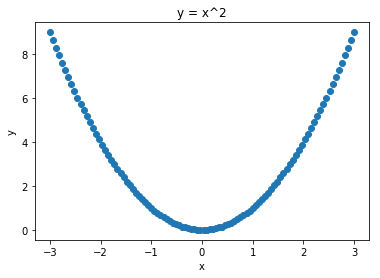

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib inline #有無都無所謂

x = np.linspace(-3,3,100) #生成一個-3~3，個數為100的等差級數
y = x**2
plt.plot(x,y,"o")

plt.title("y = x^2")

plt.xlabel("x")
plt.ylabel("y")

Text(0.5, 1.0, 'The Bias-Varlance Tradeoff')

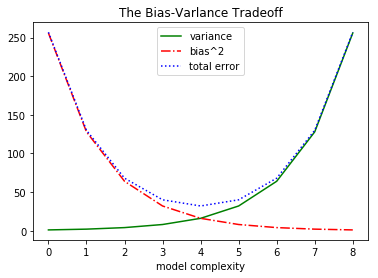

In [9]:
variance = [1,2,4,8,16,32,64,128,256]
bias_squared = [256,128,64,32,16,8,4,2,1]
total_error = [x+y for x,y in zip(variance,bias_squared)]

xs = range(len(variance))
plt.plot(xs, variance,'g-',label='variance')
plt.plot(xs, bias_squared,'r-.', label='bias^2')
plt.plot(xs, total_error,'b:', label='total error') 

plt.legend(loc=9) # loc-9 中間偏上
plt.xlabel("model complexity") 
plt.title("The Bias-Varlance Tradeoff") 

In [21]:
###### 9/27

In [22]:
#loading libraries
import pandas as pd

#define column names
names = ['sepal_length','sepal_width','petal_length','petal_width','class']

#loading training data
df = pd.read_csv('C:/Users/user/Desktop/iris.csv',header=None,names=names)

In [23]:
#observing the data
df.head()

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


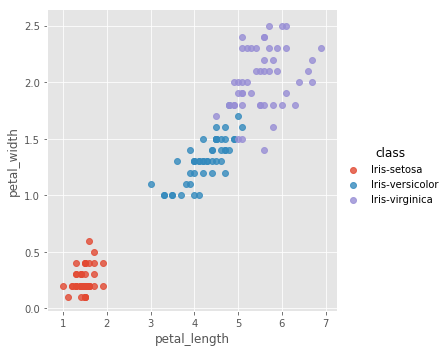

In [24]:
#畫圖
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
sns.lmplot('petal_length','petal_width',data=df,fit_reg=False,hue='class') # fit_reg=False 不要畫回歸

In [25]:
#選擇演算法
#loading libraries
import numpy as np
from sklearn.model_selection import train_test_split

#create design matrix x and target vector y
x = df.iloc[:,:-1].values #列:全列  #行:第一行到倒數第一行 
y = df.iloc[:,4].values

#split into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate learning model (k = 3);

knn = KNeighborsClassifier(n_neighbors = 3)

#fitting the model
knn.fit(x_train,y_train)

#perdict the response
pred = knn.predict(x_test)

#evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.98

In [27]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')

neighbors = [x for x in range(1,50,2)]
#neighbors = [x for x in range(1,50) if x%2!=0 如X除2的餘數不等於0則印出]
neighbors

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

In [28]:
##### 10/04

In [37]:
#pandas
#csv(comma-separated value)檔

import pandas as pd

df = pd.read_csv("D:/SCU/Grade3/data.csv")
df

,A,B,C,D
0,1,2,3.0,4.0
1,5,6,NaN,8.0
2,0,11,12.0,NaN


In [38]:
###遺漏值處理
#是否有遺漏值

df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [39]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [40]:
##刪除具有遺漏值的樣本或特徵
#刪除具有遺漏值的列
df.dropna(axis = 0)

#刪除具有遺漏值的行
df.dropna(axis = 1)

,A,B
0,1,2
1,5,6
2,0,11


In [41]:
#只刪除某特定特徵有遺漏值的樣本
df.dropna(subset = ['C'])

,A,B,C,D
0,1,2,3.0,4.0
2,0,11,12.0,NaN


In [45]:
###填補遺漏值
#用平均值

from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN',strategy='mean',axis = 0) #mean:平均 median:中位數 most_frequent:眾數
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [ 0. , 11. , 12. ,  6. ]])

In [46]:
###處理非數值型數據

import pandas as pd

df = pd.DataFrame([['green','M',10.1,'class1'],
                  ['red','L',13.5,'class2'],
                  ['blue','XL',15.3,'class1']])

df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [47]:
##順序特徵
#定義對應字典(mapping dictionary)

size_mapping = {'XL':3,
               'L':2,
               'M':1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [51]:
#將整數值轉回原始字串
inv_size_mapping = {v:k for k,v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [52]:
import numpy as np

class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [54]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,NaN
1,red,2,13.5,NaN
2,blue,3,15.3,NaN


In [55]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

#轉回原來類別
#class_le.inverse_trannsform(y)

array([0, 1, 2], dtype=int64)

In [57]:
X = df[['color','size','price']].values

color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [58]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [59]:
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [60]:
pd.get_dummies(df[['price','color','size']],drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [ ]:
##### 10/18

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('D:/SCU/Grade3/regression.csv')
X = data.iloc[:,0].values
y = data.iloc[:,-1].values

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X1 = X.reshape(-1,1)
X_std = sc_x.fit_transform(X1)

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_std,y)
y_pred = lr.predict(X_std)
print('Slope:%.3f'%lr.coef_[0])
print('Intercept:%.3f'%lr.intercept_)

Slope:93.479
Intercept:429.150


In [5]:
import sklearn.metrics as sm

print('MSE:%.3f'%sm.mean_squared_error(y,y_pred))
print('R^2:%.3f'%sm.r2_score(y,y_pred))


MSE:954.350
R^2:0.902


In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
pr = LinearRegression()
quadrtaic = PolynomialFeatures(degree = 2)
X_quad = quadrtaic.fit_transform(X_std)

In [8]:
pr.fit(X_quad,y)
y_quad_pred = pr.predict(X_quad)
print("theta1: %.3f" % pr.coef_[1]) # %.3f 字串格式化浮點數取到第三位
print("theta2: %.3f" % pr.coef_[2])
print("Intercept: %.3f" % pr.intercept_)

theta1: 95.081
theta2: 23.106
Intercept: 406.044


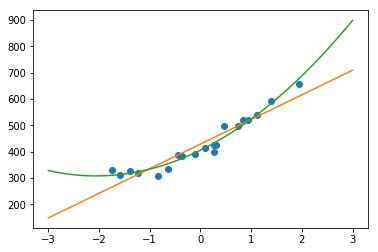

In [9]:
x = np.linspace(-3,3,100)

plt.plot(X_std,y,'o')
plt.plot(x,lr.intercept_+lr.coef_[0]*x)
plt.plot(x,pr.intercept_+pr.coef_[1]*x+pr.coef_[2]*x**2)
plt.show()

In [10]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
data.keys()

import pandas as pd

feature = pd.DataFrame(data['data'],columns = data['feature_names'])
target = pd.DataFrame(data['target'],columns = ['target'])

df = pd.concat([feature,target],axis = 1)

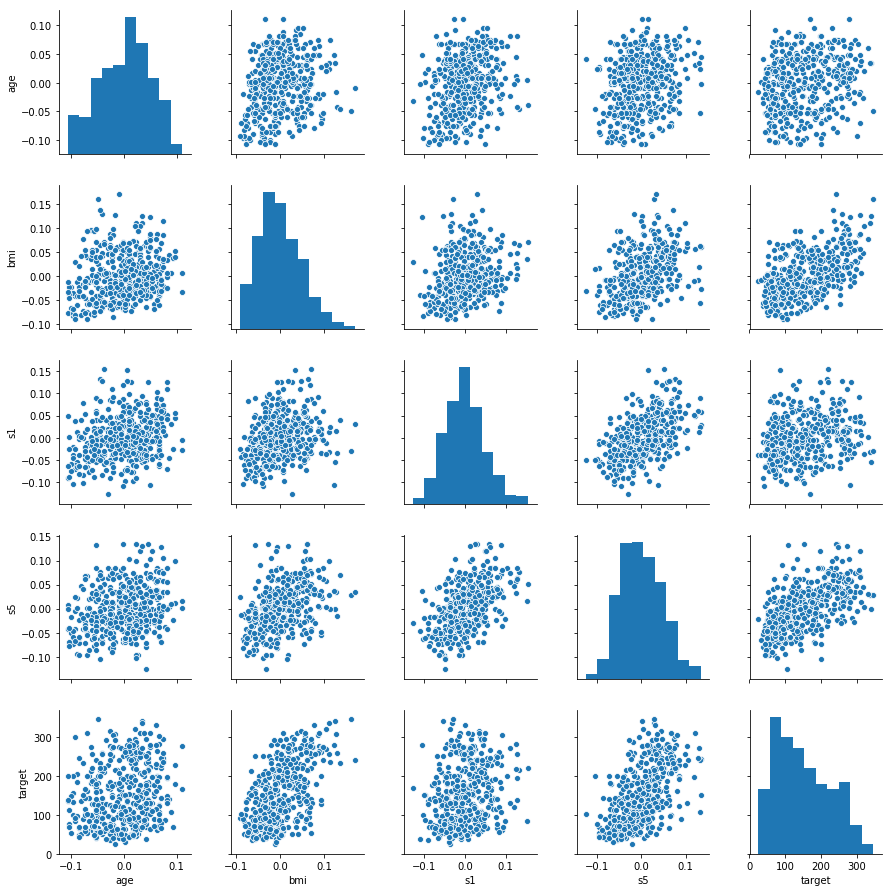

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age','bmi','s1','s5','target']

sns.pairplot(df[cols])
plt.tight_layout()
plt.savefig('scatterplot.png',dpi=300)
plt.show()

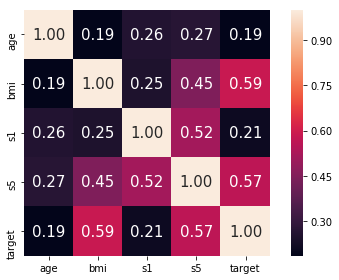

In [14]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)

hm = sns.heatmap(cm,
                cbar = True,
                annot= True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size':15},
                yticklabels = cols,
                xticklabels = cols)
plt.tight_layout()
#plt.savefig('correlation.png',dpi = 300)
plt.show()

In [18]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X,y = load_diabetes().data,load_diabetes().target
X_train,X_test,y_train,y_test = train_test_split(
    X,y,random_state = 8)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

slr = LinearRegression()

slr.fit(X_train,y_train)
print(slr.coef_)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print('MSE train:%.3f,test:%.3f'%(
        mean_squared_error(y_train,y_train_pred),
        mean_squared_error(y_test,y_test_pred)))
print('R^2 train:%.3f,test:%.3f'%(
        r2_score(y_train,y_train_pred),
        r2_score(y_test,y_test_pred)))

[   11.5106203   -282.51347161   534.20455671   401.73142674
 -1043.89718398   634.92464089   186.43262636   204.93373199
   762.47149733    91.9460394 ]
MSE train:2812.369,test:3108.041
R^2 train:0.530,test:0.459


In [12]:
#####11/1

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1).fit(X_train,y_train) #alpha = 1.0
print(ridge.coef_)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('MSE train:%.3f,test:%.3f'%(
        mean_squared_error(y_train,y_train_pred),
        mean_squared_error(y_test,y_test_pred)))
print('R^2 train:%.3f,test:%.3f'%(
        r2_score(y_train,y_train_pred),
        r2_score(y_test,y_test_pred)))

[  36.8262072   -75.80823733  282.42652716  207.39314972   -1.46580263
  -27.81750835 -134.3740951    98.97724793  222.67543268  117.97255343]
MSE train:3397.720,test:3262.233
R^2 train:0.433,test:0.433


In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1).fit(X_train,y_train) #alpha = 1.0
print(lasso.coef_)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('MSE train:%.3f,test:%.3f'%(
        mean_squared_error(y_train,y_train_pred),
        mean_squared_error(y_test,y_test_pred)))
print('R^2 train:%.3f,test:%.3f'%(
        r2_score(y_train,y_train_pred),
        r2_score(y_test,y_test_pred)))

[  0.          -0.         384.73421807  72.69325545   0.
   0.          -0.           0.         247.88881314   0.        ]
MSE train:3818.201,test:3646.836
R^2 train:0.362,test:0.366


In [26]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = .001).fit(X_train,y_train) #alpha = 1.0
print(lasso.coef_)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('MSE train:%.3f,test:%.3f'%(
        mean_squared_error(y_train,y_train_pred),
        mean_squared_error(y_test,y_test_pred)))
print('R^2 train:%.3f,test:%.3f'%(
        r2_score(y_train,y_train_pred),
        r2_score(y_test,y_test_pred)))

[  11.82931254 -281.06324599  534.59556593  401.25597128 -971.04936503
  579.28119134  151.83257187  191.85084436  736.83680063   91.17487055]
MSE train:2812.574,test:3102.099
R^2 train:0.530,test:0.460


In [29]:
from sklearn.linear_model import ElasticNet

elanet = ElasticNet(alpha = 1,l1_ratio = 0.5).fit(X_train,y_train)
print(elanet.coef_)

y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)

print('MSE train:%.3f,test:%.3f'%(
        mean_squared_error(y_train,y_train_pred),
        mean_squared_error(y_test,y_test_pred)))
print('R^2 train:%.3f,test:%.3f'%(
        r2_score(y_train,y_train_pred),
        r2_score(y_test,y_test_pred)))

[ 0.21886047  0.          3.32172605  2.40903271  0.39329589  0.0813468
 -1.66664402  1.86756919  3.0113635   1.88112395]
MSE train:5937.607,test:5704.626
R^2 train:0.009,test:0.008


In [30]:
### U4

In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

feature = pd.DataFrame(iris["data"],columns = iris["feature_names"])
target = pd.DataFrame(iris["target"],columns = ["class"])

data = pd.concat([feature,target],axis = 1)
df = data[data["class"] !=2] #只考慮類別為0、1的資料

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


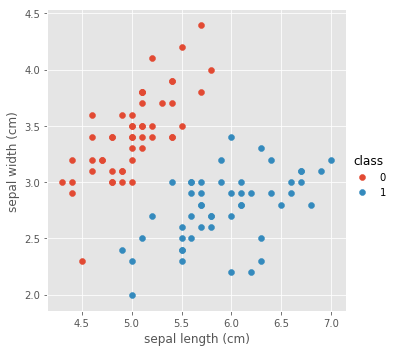

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') #make plots look better
g = sns.FacetGrid(df,hue = "class",size = 5)
g.map(plt.scatter,"sepal length (cm)", "sepal width (cm)")
g.add_legend()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,:2].values
y = df.iloc[:,4].values

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [18]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

lr = LogisticRegression(C = 100.0,random_state = 1)
lr.fit(X_std, y)

print(lr.coef_)
print(lr.intercept_ )

[[ 9.87113623 -6.67376595]]
[1.7401565]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
def plot_decision_regions(X,y,classifier,test_idx = None,resolution = 0.02):
    #setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min,x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
    if test_idx:
        X_test, y_test=X[test_idx, :],y[test_idx]
        
        plt.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c='',
                   edgecolor='black',
                   alpha=1.0,
                   linewidth=1,
                   marker='o',
                   s=100,
                   label='test set')

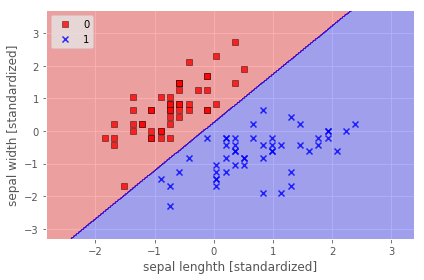

In [28]:
plot_decision_regions(X_std,y,classifier = lr)
plt.xlabel('sepal lenghth [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
#plt.savefig('images.png',dpi = 300)
plt.show()

In [41]:
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model.coordinate_descent:

class ElasticNet(sklearn.linear_model.base.LinearModel, sklearn.base.RegressorMixin)
 |  ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * L1 + b * L2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet R package while
 |  alpha corresponds to the lambda parameter

In [ ]:
######12/14

In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris()

feature = pd.DataFrame(iris["data"],columns = iris["feature_names"])
target = pd.DataFrame(iris["target"],columns = ["target"])
data = pd.concat([feature,target],axis = 1)

In [18]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [19]:
X , y = load_iris().data , load_iris().target
le = LabelEncoder()
y = le.fit_transform(y)

In [20]:
#標準化
X_train,X_test,y_train,y_test = train_test_split(
data[['sepal length (cm)','sepal width (cm)']],data[['target']])

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
x_test_std = sc.transform(X_test)

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
gnb = GaussianNB()
gnb.fit(X_train_std,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

lr = LogisticRegression(C=100.0,random_state =1)
lr.fit(X,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


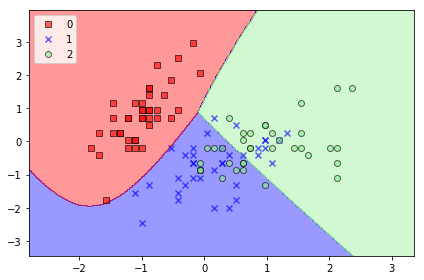

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
# from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_std,y_train['target'].values,classifier=gnb)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('svm.png',dpi = 300)
plt.show()

In [27]:
print("score:",gnb.score(X_train,y_train))

score: 0.3125


In [28]:
# X_combined_std = np.vstack((X_train_std,X_test_std))
# y_combined = np.hstack((y_train,y_test))

# plot_decision_regions(X_combined_std,y_combined,
#                      classifier = gnb,test_idx=range(105,150))
# plt.xlabel("sepal length")
# plt.ylabel("sepal width")
# plt.legend(loc='upper left')


# plt.tight_layout()
# plt.show()